<a href="https://colab.research.google.com/github/CCMunozB/Patrones/blob/main/1-preprocessing_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1 - Preprocesamiento (EDA)

El preprocesamiento y estudio de datos es la **primera etapa** a realizar dentro de un proyecto de ciencia de datos, permitiendo el comprender la información que tenemos y dar nuevas perspectivas a la problematica.# 


![EDA](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

## Importar librerias

Para comenzar debemos importar las librerias que nos apoyarán en este análisis

In [ ]:
# Biblioteca para manejar datos vectoriales
import numpy as np

# Módulo de preprocesamiento de datos
import sklearn.preprocessing 

# Biblioteca para manejo de datos
import pandas as pd 

# Visualización
import matplotlib.pyplot as plt 

## Cargar Datos

Se cargan datos reales de temperaturas registradas a través del tiempo en el mundo ([Link](https://climateknowledgeportal.worldbank.org/download-data)).

In [ ]:
!wget -q https://raw.githubusercontent.com/CCMunozB/Patrones/main/data/temperature.csv -O temperature.csv

In [ ]:
#Utilizamos Pandas y su función read_csv para leer el archivo csv.
data = pd.read_csv("temperature.csv")
data.head(5)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG
3,12.93970,1991,Apr,Afghanistan,AFG
4,17.07550,1991,May,Afghanistan,AFG


En esta base de datos se pueden ver datos Numéricos (**Temperature, Year**) y Categóricos (**Month, Country, ISO3**), según los tipos de datos y la distribución de estos se pueden aplicar distintas técnicas de preprocesamiento.



![Datos](https://365datascience.com/resources/blog/thumb@1024_xzk3rl06exk-data-types.webp)

## Generar Datos Sintéticos

Generaremos un conjunto de datos sintético con el cual exploraremos las distintas técnicas de preprocesamiento de datos para aprendizaje de máquinas.

In [ ]:
# Fijamos la semilla del generador de datos al azar para obtener resultados consistentes
np.random.seed(11) 

In [ ]:
# Generamos datos sintéticos utilizando una distribución normal de media loc y desviación estándar scale
x1 = np.random.normal(loc=100, scale=30, size=10000) 

In [ ]:
# Generamos datos sintéticos utilizando una distribución uniforme entre low y high.
x2 = np.random.uniform(low=1000, high=2000, size=10000) 

In [ ]:
# Generamos un conjunto de datos con outliers desde la variable anterior.
x3 = x2.copy()
x3[np.random.randint(low=0,high=x2.size,size=1000)] = np.random.uniform(low=5, high=6, size=1000) 

In [ ]:
# Generamos una variable que contiene distintos grupos de datos determinados por distintas distribuciones normales.
x4 = np.hstack([
           np.random.normal(loc=1000, scale=300, size=1500),
           np.random.normal(loc=2000, scale=300, size=2000),
           np.random.normal(loc=3000, scale=300, size=3000),
           np.random.normal(loc=4000, scale=300, size=3500),
           ])

# Agrupamos nuestras variables en una matriz bidimensional.
x = np.stack([x1,x2,x3,x4],axis=1) 

Una de las características que deben tener nuestras variables para una correcta aplicación de ciertos algoritmos de aprendizaje de máquinas es que todas deben estar en el mismo rango. Con la siguiente visualización se puede evaluar que todas las variables cuentan con distintos rangos y distribuciones. Una de las convencionas más utilizadas es escalar todas nuestras variables hacia valores entre 0 y 1 o que se distribuyan con una distribución normal de media 0 y desviación estándar 1.

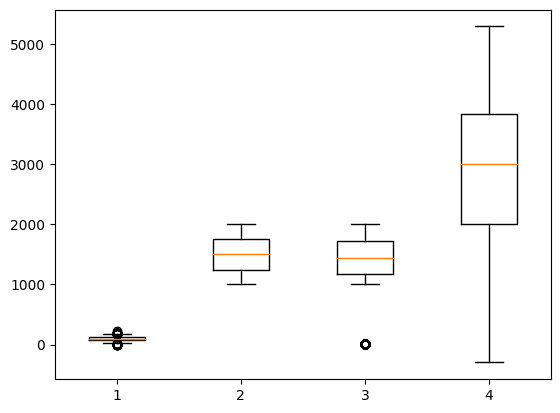

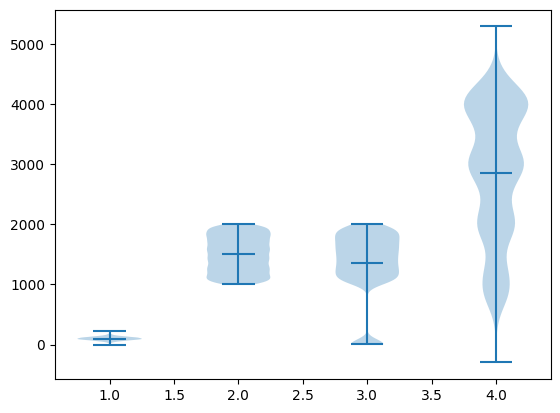

In [ ]:
# Visualizamos nuestro conjunto de datos a través de un box plot para evaluar los rangos y distribuciones de nuestras variables.
plt.boxplot(x)
plt.show()
print("\n \n")
#Como se ve con Violinplot
plt.violinplot(x, showmeans=True)
plt.show()

## Actividad 1:
Nuestra primera variable se distribuye de manera normal, pero está desplazada del 0 y además tiene una desviación estándar distinta a 1. Programe una función que escale **esta variable** y a la **temperatura** de los datos reales a una distribución estándar de media 0 y desviación estándar 1. Este proceso de escalamiento se llama Standard Scaling.

Datos Sintéticos 



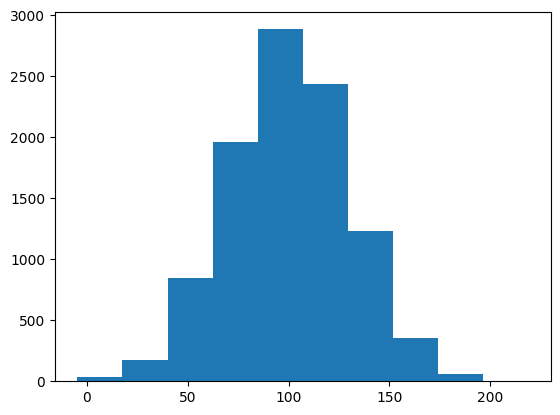


Temperatura 



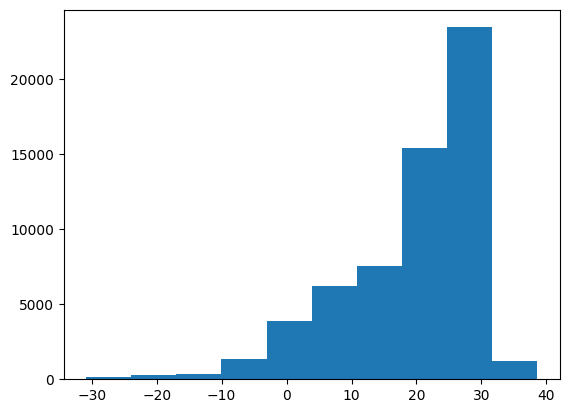

In [ ]:
# La variable x es un conjunto de arrelos, por lo qué para acceder necesitamos indicales el índice que nos interesa (este caso es 0)
print("Datos Sintéticos \n")
plt.hist(x[:,0])
plt.show()
print()

# Por otro lado, utilizando Pandas podemos acceder a los datos que nos interesa utilizando el nombre de la variable (este caso Temperature)
print("Temperatura \n")
plt.hist(data["Temperature"])
plt.show()

In [ ]:
def standard_scaler(a):
  a_scaled = (a - a.mean()) / (a.std())
  return a_scaled

Datos Sintéticos 



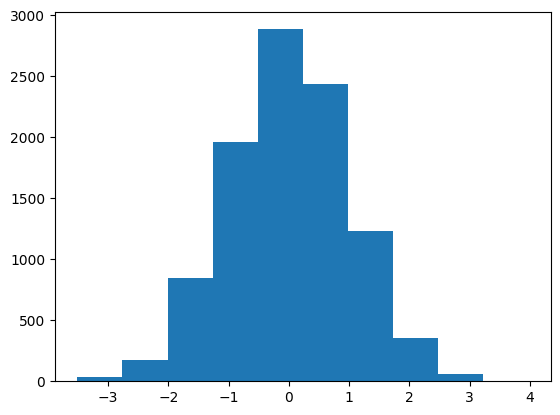


Temperatura 



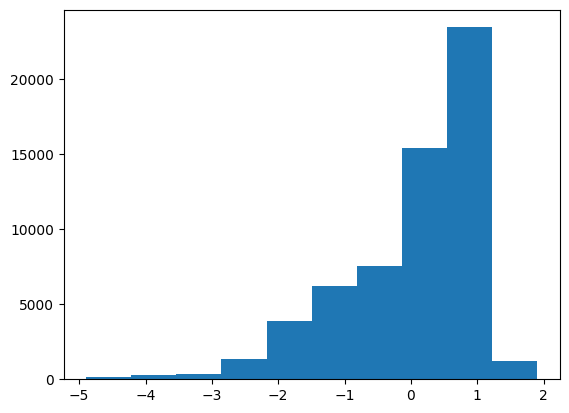

In [ ]:
print("Datos Sintéticos \n")
plt.hist(standard_scaler(x[:,0]))
plt.show()
print()

print("Temperatura \n")
plt.hist(standard_scaler(data["Temperature"]))
plt.show()

## Actividad 2:
Nuestra segunda variable se distribuye de manera uniforme, pero tiene un rango muy distinto a las demás variables. Programe una función que escale **esta variable** y el **año registrado** hacia valores entre 0 y 1, donde el menor valor sea escalado a 0 y el mayor a 1. Este proceso de escalamiento se llama Min-Max Scaling.

Datos Sintéticos 



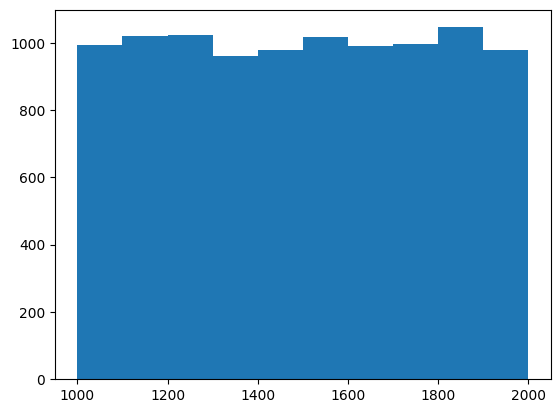


Año 



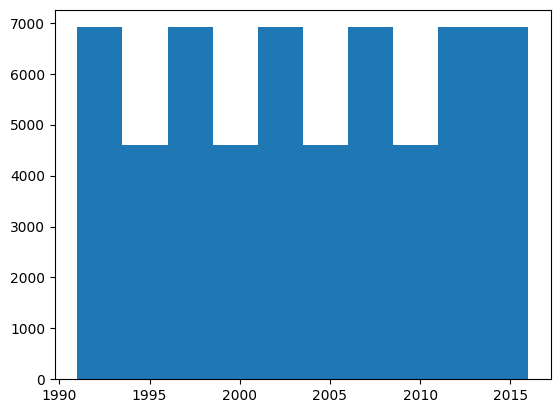

In [ ]:
print("Datos Sintéticos \n")
plt.hist(x[:,1])
plt.show()
print()

print("Año \n")
plt.hist(data["Year"])
plt.show()

In [ ]:
def min_max_scaler(a):
  a_scaled = (a - a.min()) / (a.max() - a.min())
  return a_scaled

Datos Sintéticos 



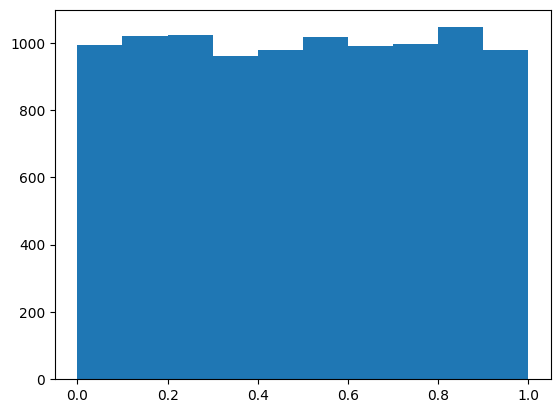


Año 



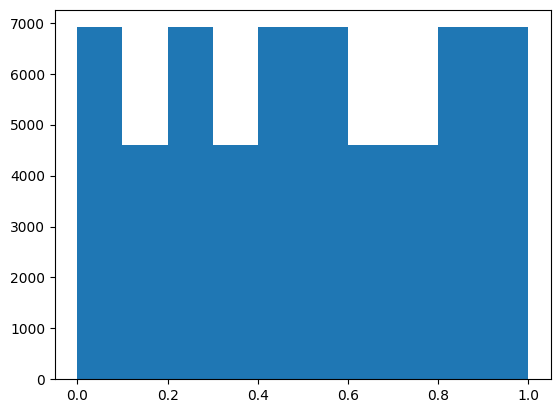

In [ ]:
print("Datos Sintéticos \n")
plt.hist(min_max_scaler(x[:,1]))
plt.show()
print()

print("Año \n")
plt.hist(min_max_scaler(data["Year"]))
plt.show()

## Actividad 3:
Es muy frecuente que dentro de nuestros conjuntos de datos encontremos outliers. La variable 3 tiene una distribución uniforme pero cuenta con valores outliers. ¿Cómo se comporta el Min-Max Scaling en este caso?, aplique otro método de escalamiento que sea robusto a outliers.

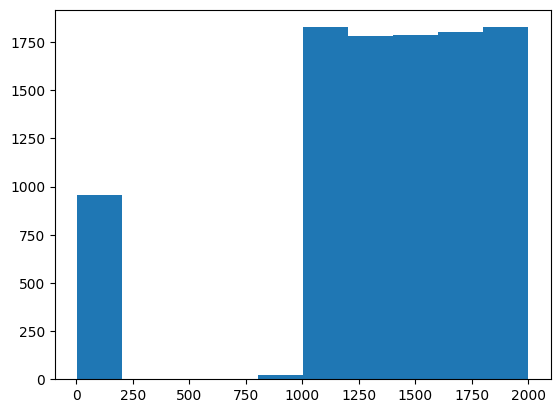

In [ ]:
plt.hist(x[:,2])
plt.show()

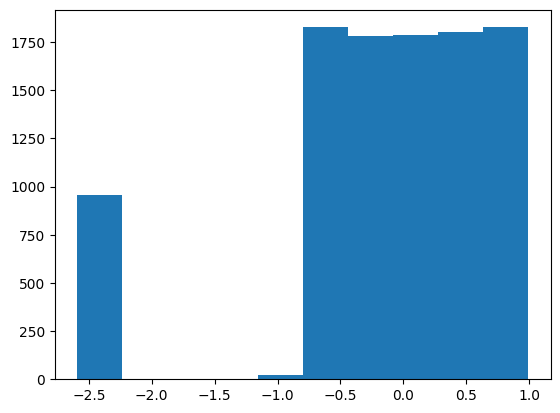

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()
plt.hist(scaler.fit_transform(x[:,2].reshape(-1, 1)))
plt.show()

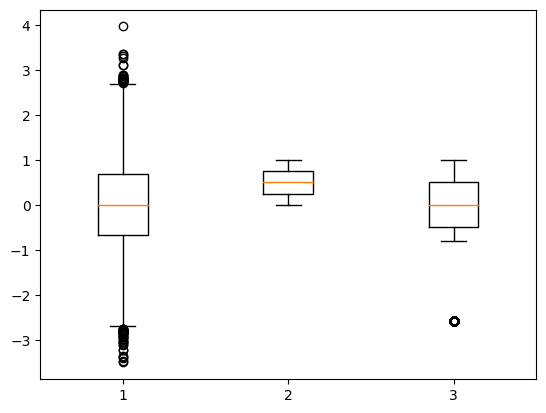

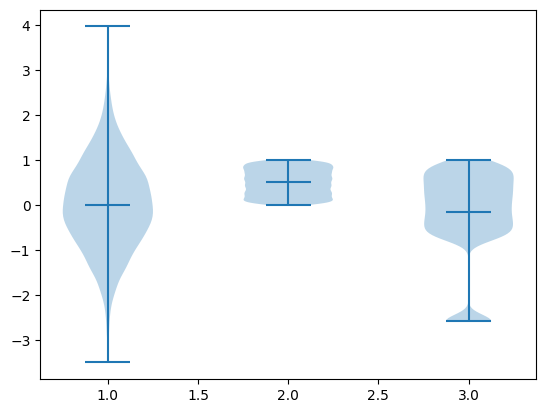

In [ ]:
x_scaled = x[:,:3]
x_scaled[:,0] = standard_scaler(x[:,0])
x_scaled[:,1] = min_max_scaler(x[:,1])
x_scaled[:,2] = scaler.fit_transform(x[:,2].reshape(-1, 1)).flatten()
plt.boxplot(x_scaled)
plt.show()

print("\n \n")
#Como se ve con Violinplot
plt.violinplot(x_scaled, showmeans=True)
plt.show()

## Actividad 4:
Otro método de preprocesamiento que se utiliza en ciencia de datos es la transformación de variables continuas hacia valores discretos. Valore la calidad de la discretización aplicada sobre la cuarta variable y modifique el proceso de discretización para que funcione óptimamente.

![Strategies](https://scikit-learn.org/stable/_images/sphx_glr_plot_discretization_strategies_001.png)

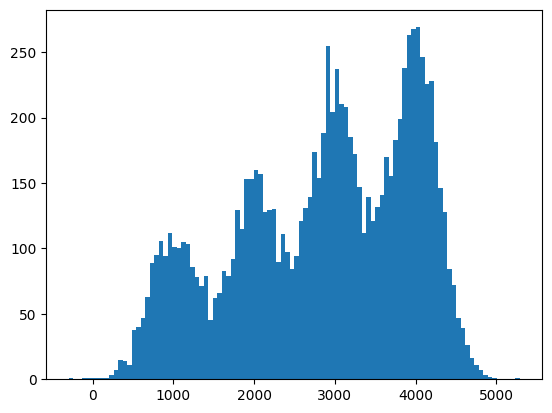

In [ ]:
plt.hist(x[:,3], bins=100)
plt.show()

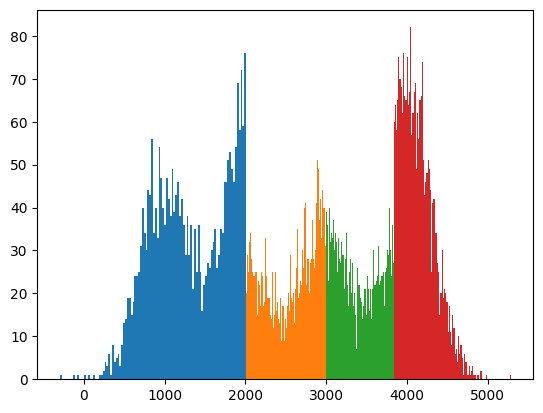

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

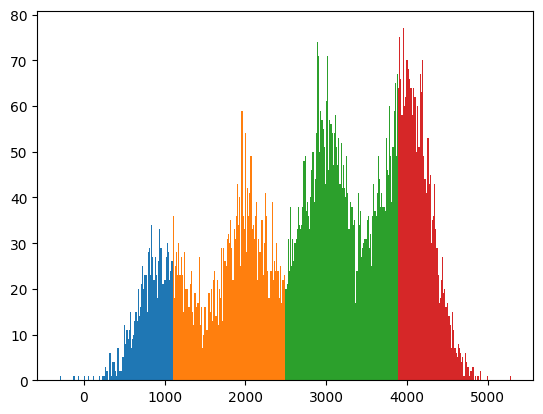

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

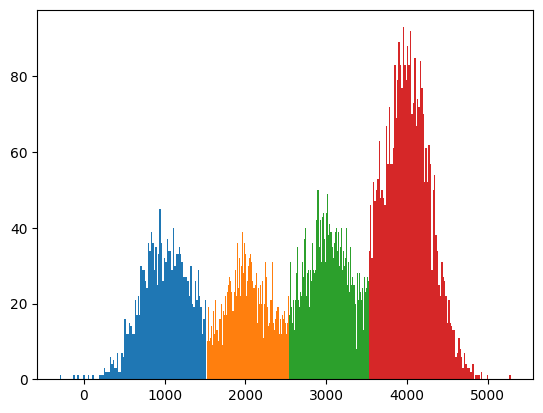

In [ ]:
# Modifique este proceso de discretización para que funcione óptimamente.
discretizer = sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='kmeans')
x4_discrete = discretizer.fit_transform(x[:,3].reshape(-1, 1))
for i in range(4):
  plt.hist(x[(x4_discrete == i).flatten(),3],bins=100)

## Valores de propiedades desde atributos de las casas

Este conjunto de datos relaciona los valores de venta de propiedades con atributos de las mismas. Cada una de las características de las casas tienen una alta diferencia de rango entre si. Evalue el mejor método de escalamiento apra cada variable y aplíquelo.

In [ ]:
real_estate = pd.read_csv("https://github.com/fvillena/mlfa/raw/master/data/real_estate.csv", delimiter=";")

In [ ]:
real_estate.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
import seaborn as sns

def plot_distribution(df,title):
    """
    Esta función recibe un dataframe de características y un titulo.
    Retorna un gráfico de violines para cada una de las características.
    """
    sns.violinplot(
        data=df.melt(), # Cambiamos el esquema del dataframe para que sea solo de 2 columnas
        y="variable",
        x="value",
        cut=0
    )
    plt.title(title)
    plt.show()

def rescale_data(df,scaler):
    """
    Recibe un dataframe y un método de escalamiento de variables.
    Retorna un dataframe con las variables escaladas utilizando el método especificado.
    """
    if scaler != None:
        features_rescaled = scaler.fit_transform(features) # Transformamos los datos utilizando un método de escalamiento.
        return pd.DataFrame(features_rescaled,columns=feature_names)
    else:
        return df

In [ ]:
feature_names = [
    'transaction_date', 
    'house_age', 
    'distance_nearest_station', 
    'number_convenience_stores', 
    'latitude', 
    'longitude'
]

features = real_estate[feature_names]

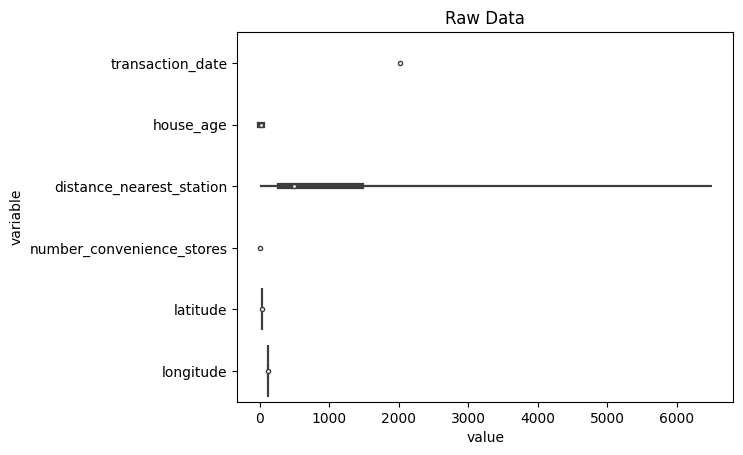

In [ ]:
plot_distribution(features,"Raw Data")

In [ ]:
features_rs = rescale_data(features,sklearn.preprocessing.RobustScaler())
features_rs.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-0.035427,0.084317,0.507878,0.018841,-0.143198,-0.346184
std,0.563991,0.595685,1.083398,0.589112,0.858540,1.008356
min,-1.000000,-0.841830,-0.402461,-0.800000,-2.700104,-4.277267
25%,-0.500000,-0.369935,-0.174176,-0.600000,-0.560360,-0.692838
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.630065,0.825824,0.400000,0.439640,0.307162
max,0.833332,1.448366,5.146803,1.200000,3.008648,1.816032


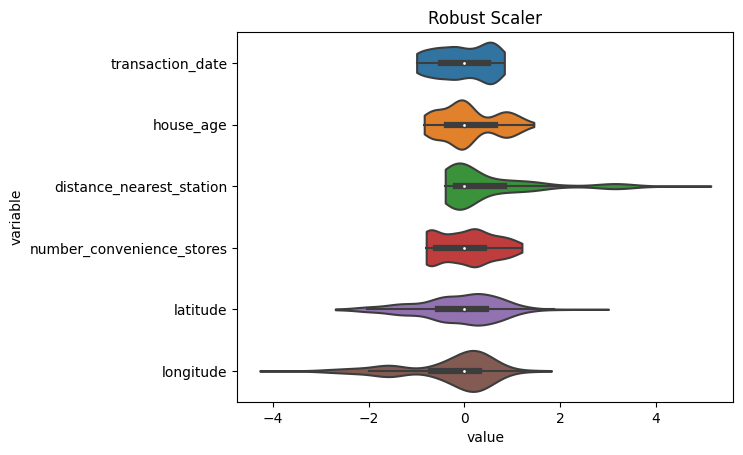

In [ ]:
plot_distribution(features_rs,"Robust Scaler")